# 用户指南，第31章：谱号、同音连音符和符尾连线
[原文链接](https://web.mit.edu/music21/doc/usersGuide/usersGuide_31_clefs.html)

在前30章，我们一直在和基础的音乐记谱概念打交道，例如谱号`Clef`、同音连音符`Tie`和符尾连线`Beam`，但是我们从未直接上手处理它们。本章将深入这些概念，并看看有哪些`Stream`方法来处理它们。

## 谱号`Clef`
首先介绍谱号`Clef`，它位于`music21.clef`模块

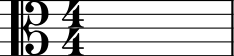

In [1]:
from music21 import *
alto = clef.AltoClef()
m = stream.Measure([alto])
m.show()

由于`Clef`可以存入`Stream`，所以`Clef`是`Music21Object`，拥有时刻等属性，但`Clef`的时值为0

In [2]:
alto.offset

0.0

In [3]:
alto.duration

<music21.duration.Duration 0.0>

同一个小节可以有多个谱号，可以同时显示出来（但是两个谱号之间至少有一个音符。这是我们的MusicXML阅读器的问题）:

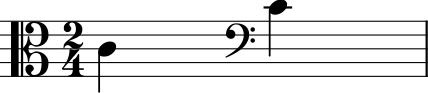

In [4]:
m.append(note.Note('C4'))
bass = clef.BassClef()
m.append(bass)
m.append(note.Note('C4'))
m.show()

todo

In [5]:
alto.line

3

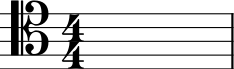

In [6]:
tenor = clef.TenorClef()
tenor.show()

In [7]:
tenor.line

4

`.line`属性表示该谱号的"sign"所处的线（F谱号、C谱号、G谱号）

In [8]:
tenor.sign

'C'

In [9]:
treble = clef.TrebleClef()
treble.sign

'G'

`Clef`还有一个`octaveChange`，支持整八度的上下移动

In [10]:
treble.octaveChange

0

In [11]:
t8vb = clef.Treble8vbClef()
t8vb.octaveChange

-1

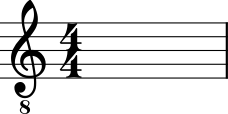

In [12]:
t8vb.show()

也有不支持Pitch的谱号，例如`NoClef`

In [13]:
noClef = clef.NoClef()

Musescore不支持`NoClef`，但是在一些其他的MusicXML阅读器中，`NoClef`会显示为无谱号的乐谱。打击乐谱号也是无音高谱号

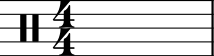

In [14]:
clef.PercussionClef().show()

music21内置了很多谱号，包括不常用的谱号，例如`MezzoSopranoClef`、`SubBassClef`和`JianpuClef`，都在`music21.clef`模块中。但是你也可以创造自己的谱号。

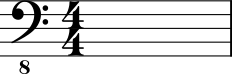

In [15]:
pc = clef.PitchClef()
pc.sign = 'F'
pc.line = 4
pc.octaveChange = -1
pc.show()

也可以用`clefFromString()`函数将字符串转为谱号。

In [16]:
clef.clefFromString('treble')

<music21.clef.TrebleClef>

或者是从音高生成谱号

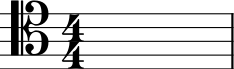

In [17]:
c = clef.clefFromString('C4')
c.show()

### 自动生成谱号
看看下面这个`Stream`

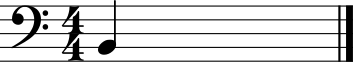

In [18]:
n = note.Note('B2')
s = stream.Stream([n])
s.show()

music21是怎么知道要用低音谱号的呢？这是因为，`clef`模块的`bestClef()`函数,能返回一段旋律的最佳谱号：

In [19]:
clef.bestClef(s)

<music21.clef.BassClef>

In [20]:
s.append(note.Note('C6'))
clef.bestClef(s)

<music21.clef.TrebleClef>

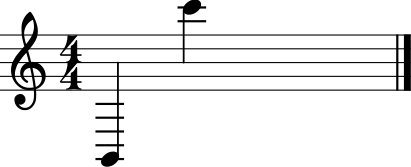

In [21]:
s.show()

`bestClef`有两个选项，`allowTreble8vb`和`recurse`。

如果将`allowTreble8vb`设为`True`，则返回的谱号可以是八度移动的谱号

In [22]:
n = note.Note('B3')
s = stream.Stream([n])
clef.bestClef(s, allowTreble8vb=True)

<music21.clef.Treble8vbClef>

如果在嵌套`Stream`上运行，则`recurse`应设为`True`

In [23]:
bass = corpus.parse('bwv66.6').parts['bass']
clef.bestClef(bass)

<music21.clef.TrebleClef>

In [24]:
clef.bestClef(bass, recurse=True)

<music21.clef.BassClef>

## 同音连音符`Tie`
> 译者注：异音连音符`Slur`见[第29章](29.ipynb)。
> 
> 同音连音符与异音连音符意义不同。同音连音符仅为方便记谱，在演奏与处理时等同于一个音符。异音连音符为演奏技法符号，处理时视为两个音符，人声演唱时一个字跨两个音高，即歌声合成软件中的减号`-`。

`Tie`连接两个具有相同音高的音符。所有的音符都有`.tie`属性，指示同音连音符的存在情况。以Agnus Dei的第0音轨为例：

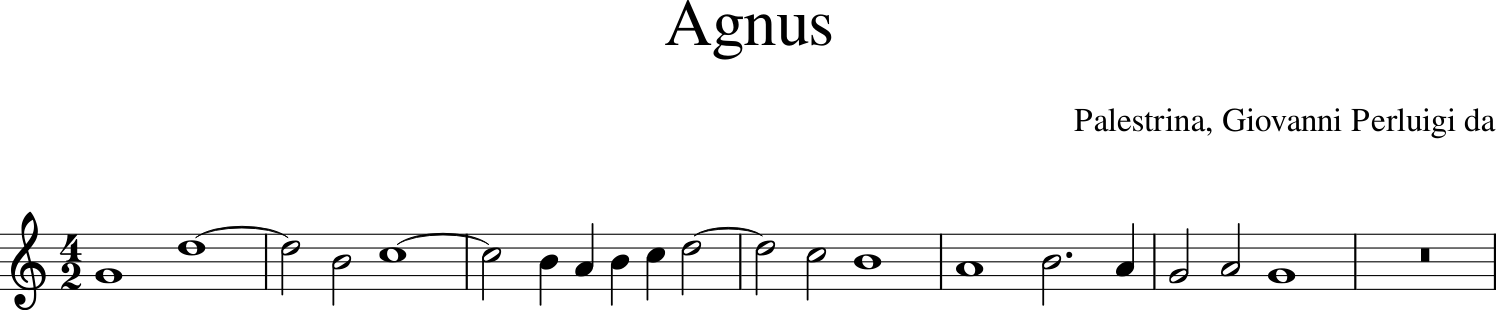

In [25]:
agnus = corpus.parse('palestrina/Agnus_01')
agnusSop = agnus.parts[0]
agnusSop.measures(1, 7).show()

第二个和第三个音符连起来了，我们来找到它：

In [26]:
n1 = agnusSop.recurse().notes[1]
n1

<music21.note.Note D>

现在来看看`.tie`属性

In [27]:
n1.tie

<music21.tie.Tie start>

In [28]:
n1.next('Note').tie

<music21.tie.Tie stop>

第二个`.tie`属性并没有显示在乐谱上，说明`Tie`对象表示音符间的连接**状态**，而不是连接线本身。

而前一个音符没有连接，它的`.tie`为None

In [29]:
print(n1.previous('Note').tie)

None


我们可以在`Tie`的`.type`中找到"start"或"stop"

In [30]:
n1.tie.type

'start'

In [31]:
n1.next("Note").tie.type

'stop'

还有第三种类型，"continue"，表示一个音符和前后两个音符都连起来了。下面来创建一个：

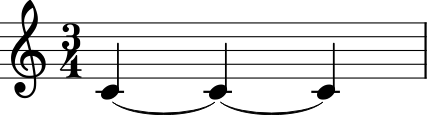

In [32]:
c0 = note.Note('C4')
c0.tie = tie.Tie('start')
c1 = note.Note('C4')
c1.tie = tie.Tie('continue')
c2 = note.Note('C4')
c2.tie = tie.Tie('stop')
s = stream.Measure()
s.append([c0, c1, c2])
s.show()

`Tie`还有一个`.placement`参数，表示连线的位置，可以是"above"（上方）、"below"（下方）、或者`None`（由乐谱渲染器自动决定）：

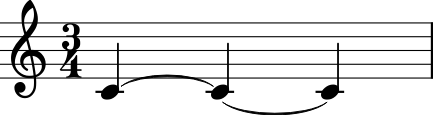

In [33]:
c0.tie.placement = 'above'
s.show()

`placement`作用于音符右侧的连线，对"stop"无效。

`Tie`还有一个`style`属性，表示连线的线型，可以是"normal"、"dotted"、"dashed"或"hidden"

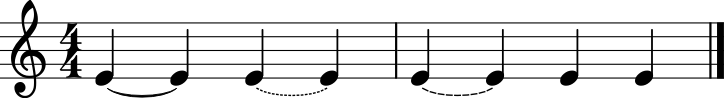

In [34]:
s = stream.Stream()
for tie_style in ('normal', 'dotted', 'dashed', 'hidden'):
    nStart = note.Note('E4')
    tStart = tie.Tie('start')
    tStart.style = tie_style
    nStart.tie = tStart
    nStop = note.Note('E4')
    tStop = tie.Tie('stop')
    tStop.style = tie_style # optional
    nStop.tie = tStop
    s.append([nStart, nStop])
s.show()

某些乐谱编辑器中，"dotted"和"dashed"可能难以区分

### 同音连音符与和弦

和弦也有一个`.tie`属性：

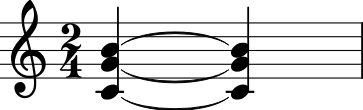

In [35]:
ch0 = chord.Chord('C4 G4 B4')
ch0.tie = tie.Tie('start')
ch1 = chord.Chord('C4 G4 B4')
ch1.tie = tie.Tie('stop')
s = stream.Measure()
s.append([ch0, ch1])
s.show()

如果是两个完全相同的和弦，以上方式很简单。但是，如果有两个和弦，其中一些音符要连起来，另一些不要，怎么办？例如：

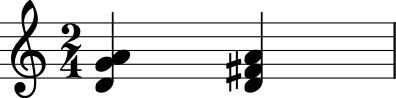

In [36]:
ch2 = chord.Chord('D4 G4 A4')
ch3 = chord.Chord('D4 F#4 A4')
s = stream.Measure()
s.append([ch2, ch3])
s.show()

D和A可以连起来，但是G和F#不连起来。你可能会想把一个`Tie`对象赋值给pitch的`.tie`属性，但是这是错误的

In [37]:
p0 = ch2.pitches[0]
p0

<music21.pitch.Pitch D4>

In [38]:
#p0.tie = tie.Tie('start')  #请勿运行

`Pitch`对象没有`.tie`属性。虽然在Python中可以给任何对象赋予任何属性，但是`music21`只会在音符和和弦里面找`.tie`。所以，我们需要知道，`Chord`内部不只储存了`Pitch`，还储存了`Note`，可以通过`Chord`的索引访问：

In [39]:
for n in ch2:
    print(n)

<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note A>


所以可以这样做：

In [40]:
ch2[0]

<music21.note.Note D>

In [41]:
ch2[0].tie = tie.Tie('start')

这种方法是可行的，但是你可能不想记住和弦索引与音符的关系，所以你也可以用音高字符串作为索引来访问和弦中的音符

In [42]:
ch2["A4"]

<music21.note.Note A>

注意这只有当和弦没有重复音高时才能正常工作。我们也可以在字符串中直接指定访问属性：

In [43]:
ch2['D4.tie']

<music21.tie.Tie start>

或者这样（注意是字符串）

In [44]:
ch2['0.tie']

<music21.tie.Tie start>

也可以用这种访问方式来赋值：

In [45]:
ch2['A4.tie'] = tie.Tie('start')

现在来给下一个和弦设置"stop"信息

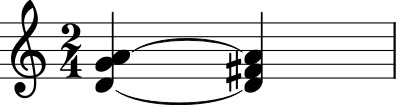

In [46]:
ch3['D4.tie'] = tie.Tie('start')
ch3['A4.tie'] = tie.Tie('start')

s.show()

那么这时候`ch2.tie`会返回什么呢？

In [47]:
ch2.tie

<music21.tie.Tie start>

和弦的`Tie`属性来自最低的有`tie`的音符。所以，如果删除D4上的`tie`，返回值不变。

In [48]:
ch2['D4.tie'] = None
ch2.tie

<music21.tie.Tie start>

但是如果把A4的`tie`也删除，结果就不一样了：

In [49]:
ch2['A4'].tie = None
ch2.tie is None

True

下面是需要手动设置连线位置`.placement`的一种场景：

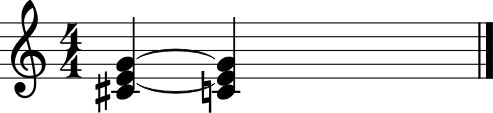

In [50]:
c1 = chord.Chord('C#4 E4 G4')
c2 = chord.Chord('C4 E4 G4')
c1[1].tie = tie.Tie('start')
c2[1].tie = tie.Tie('stop')
c1[2].tie = tie.Tie('start')
c2[2].tie = tie.Tie('stop')
s = stream.Stream()
s.append([c1, c2])
s.show()

如果像上面这样，把E的连线画在下面，则读者可能会看成是从C#到C的连线。这个时候就可以用`.placement`来消除歧义

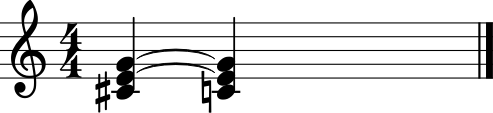

In [51]:
c1[1].tie.placement = 'above'
s.show()

### 对`Stream`自动生成或合并连音符
有时连音符会干扰我们的分析。例如下面这段旋律：

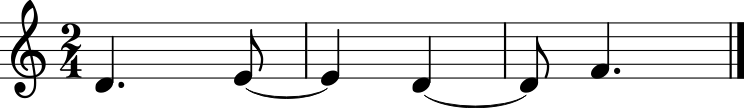

In [53]:
littlePiece = converter.parse('tinyNotation: 2/4 d4. e8~ e4 d4~ d8 f4.')
littlePiece.show()

假如我们需要统计D出现的次数，但是以下代码会得到错误结果

In [54]:
numDs = 0
for n in littlePiece.recurse().notes:
    if n.pitch.name == 'D':
        numDs += 1
numDs

3

第一个D正确地计入结果。但是被小节线截断的第二个D被计入了两次。可以用以下方法获取D的正确数量：

In [55]:
numDs = 0
for n in littlePiece.recurse().notes:
    if (n.pitch.name == 'D'
            and (n.tie is None
                 or n.tie.type == 'start')):
        numDs += 1
numDs

2

但是，如果要进行更复杂的操作的话，代码会很混乱。所以如果`Stream`没有连音符就好了。

可以用`stripTies()`合并`Stream`中的所有连音符。

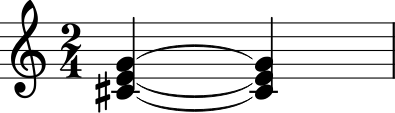

In [56]:
c = chord.Chord('C#4 E4 G4')
c.tie = tie.Tie('start')
c2 = chord.Chord('C#4 E4 G4')
c2.tie = tie.Tie('stop')
s = stream.Measure()
s.append([c, c2])
s.show()

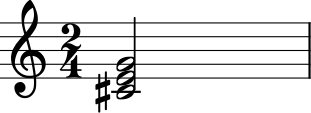

In [57]:
s2 = s.stripTies()
s2.show()

回到刚才的片段，所有音符都是附点四分音符，只是有的被小节线截断了而已。要想修复，可以用`stripTies()`。

In [58]:
littleStripped = littlePiece.stripTies()

现在再来统计D的数量：

In [59]:
numDs = 0
for n in littleStripped.recurse().notes:
    if n.pitch.name == 'D':
        numDs += 1
numDs

2

这就对了。我们再用文本形式看一下`littleStripped`

In [60]:
littleStripped.show('text', addEndTimes=True)

{0.0 - 3.0} <music21.stream.Measure 1 offset=0.0>
    {0.0 - 0.0} <music21.clef.TrebleClef>
    {0.0 - 0.0} <music21.meter.TimeSignature 2/4>
    {0.0 - 1.5} <music21.note.Note D>
    {1.5 - 3.0} <music21.note.Note E>
{2.0 - 4.5} <music21.stream.Measure 2 offset=2.0>
    {1.0 - 2.5} <music21.note.Note D>
{4.0 - 6.0} <music21.stream.Measure 3 offset=4.0>
    {0.5 - 2.0} <music21.note.Note F>
    {2.0 - 2.0} <music21.bar.Barline type=final>


注意一件事情：音符E现在超出了第一个2/4小节的范围。第二个D也不是从小节开头开始，而是从上一个小节的中间开始。所以，先`.flatten()`再`stripTies()`更好。

In [61]:
stripped2 = littlePiece.stripTies().flatten()
stripped2.show('text', addEndTimes=True)

{0.0 - 0.0} <music21.clef.TrebleClef>
{0.0 - 0.0} <music21.meter.TimeSignature 2/4>
{0.0 - 1.5} <music21.note.Note D>
{1.5 - 3.0} <music21.note.Note E>
{3.0 - 4.5} <music21.note.Note D>
{4.5 - 6.0} <music21.note.Note F>
{6.0 - 6.0} <music21.bar.Barline type=final>


这样就方便看清楚每个音符的长度和开始时间了。

记得在[第17章](17.ipynb)中说过，如果要从合并后的乐谱回到原来被截断的样子，可以用`.derivation()`。例如，给原乐谱的单数位音符加入重音符号（忽略同音连音符）：

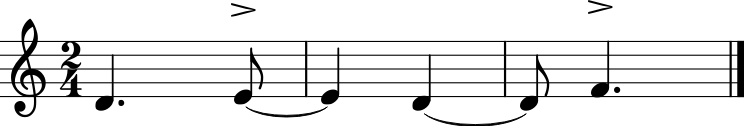

In [62]:
for i, n in enumerate(stripped2.notes):
    if i % 2 == 1:
        nOrigin = n.derivation.origin
        nOrigin.articulations.append(articulations.Accent())
littlePiece.show()

如果只是要进行`.stripTies()`的逆操作，则请使用`.makeTies()`。例如，把所有的D改为C，并恢复同音连音符：

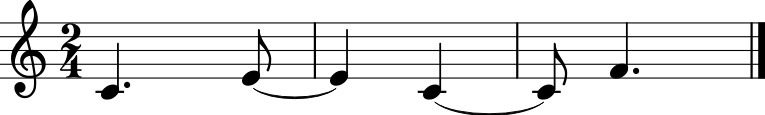

In [63]:
for n in littleStripped.recurse().notes:
    if n.pitch.name == 'D':
        n.pitch.name = 'C'

unstripped = littleStripped.makeTies()
unstripped.show()

事实上，music21每次显示乐谱前都会运行`.maketies`（否则不能用MusicXML显示）。所以，如果你只是要显示乐谱，就不用手动`makeTies`：

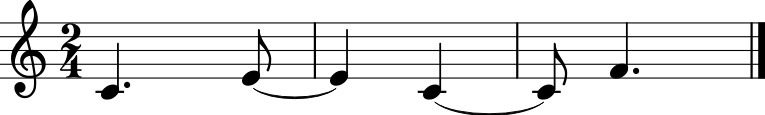

In [64]:
littleStripped.show()

## 符尾连线
符尾连线是17世纪的发明，用来通过分组的方式清晰地展示一连串八分、16分，或者更小的音符。
todo

In [65]:
m = stream.Measure()
c = note.Note('C4', type='quarter')
m.append(c)
d1 = note.Note('D4', type='eighth')
d2 = note.Note('D4', type='eighth')
m.append([d1, d2])
e = note.Note('E4', type='16th')
m.repeatAppend(e, 4)
m.show('text')

{0.0} <music21.note.Note C>
{1.0} <music21.note.Note D>
{1.5} <music21.note.Note D>
{2.0} <music21.note.Note E>
{2.25} <music21.note.Note E>
{2.5} <music21.note.Note E>
{2.75} <music21.note.Note E>


In [66]:
c.beams

<music21.beam.Beams>

In [67]:
beam1 = beam.Beam(type='start', number=1)

In [ ]:
d1Beams = d1.beams
d1Beams.append(beam1)
d1.beams

In [68]:
d2.beams.append('stop')
d2.beams

<music21.beam.Beams <music21.beam.Beam 1/stop>>

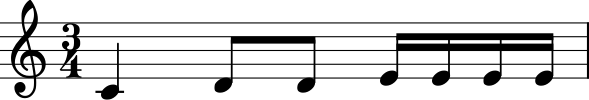

In [69]:
m.show()

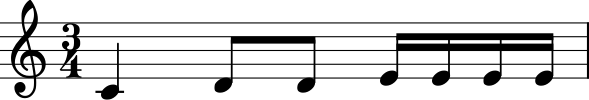

In [70]:
m.notes[3].beams.fill(2, 'start')
m.notes[4].beams.fill(2, 'continue')
m.notes[5].beams.fill(2, 'continue')
m.notes[6].beams.fill(2, 'stop')
m.show()

In [71]:
m.notes[4].beams.setByNumber(1, 'stop')
m.notes[5].beams.setByNumber(1, 'start')

In [72]:
m2 = stream.Measure()
m2.append(meter.TimeSignature('6/8'))
c4 = note.Note('C4')
d8 = note.Note('D4', type='eighth')
e8 = note.Note('E4', type='eighth')
e8.beams.append('start')
f16 = note.Note('F4', type='16th')
f16.beams.append('continue')

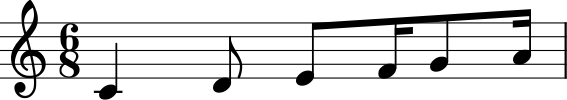

In [73]:
f16.beams.append('partial', 'right')
g8 = note.Note('G4', type='eighth')
g8.beams.append('continue')
a16 = note.Note('A4', type='16th')
a16.beams.append('stop')
a16.beams.append('partial', 'left')
m2.append([c4, d8, e8, f16, g8, a16])
m2.show()

todo

### 用更简单的方式处理符尾连线
这一节从最底层开始介绍music21中的符尾连线，但是大多数时候，我们只想关注音乐问题，而根本不想处理符尾连线这种琐碎细节。所以，如果你想用可读性最强的方式展示乐谱，那就忘记`Beam`的用法，直接`show()`即可。

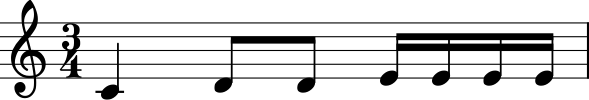

In [74]:
m = stream.Measure()
ts34 = meter.TimeSignature('3/4')
m.append(ts34)
c = note.Note('C4', type='quarter')
m.append(c)
d1 = note.Note('D4', type='eighth')
d2 = note.Note('D4', type='eighth')
m.append([d1, d2])
e = note.Note('E4', type='16th')
m.repeatAppend(e, 4)
m.show()

如果节拍修改了，music21会自动重新分组：

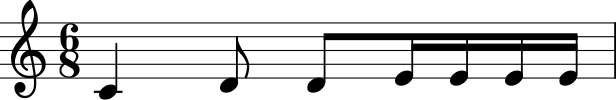

In [75]:
ts68 = meter.TimeSignature('6/8')
m.replace(ts34, ts68)
m.show()

这是因为，在显示`Stream`前，music21会对它运行一个很牛逼的函数，`makeNotation()`，它会调用`music21.stream.makeNotation.makeBeams()`。这个函数会先检查是否已经有了符尾连线

In [76]:
m.streamStatus.haveBeamsBeenMade()

False

如果有了，`haveBeamsBeenMade`会返回`True`，然后就不会“自作主张”重新分组。

In [77]:
m.notes[-2].beams.fill(2, 'start')
m.notes[-1].beams.fill(2, 'stop')

m.streamStatus.haveBeamsBeenMade()

True

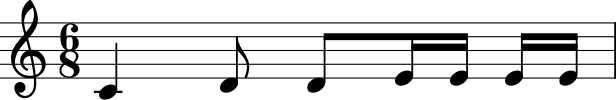

In [78]:
m.show()

todo